<a href="https://colab.research.google.com/github/tkd8973/MachineLearning_SW/blob/main/tkd8973/ML_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 회귀
* 연속형 변수로 목표 변수 예측이 목적
* 연속된 변수를 예측하는 최적의 직선을 찾는 알고리즘
* 예측할 변수만 연속이면 되고, 그 외 변수는 연속적일 필요X
---
* 머신러닝 기초 알고리즘
* 상대적으로 예측력이 떨어지지만 특성이 복잡하지 않을 때는 쉽고 빠른 예측이 가능 하기 때문에 많이 사용
* 성능 비교를 위해 베이스라인으로 사용하기도 함
---
* 장점 : 모델이 간단 -> 구현과 해석이 쉬움 -> 소요시간 짧음
* 단점 : 최신 알고리즘에 비해 낮은 예측력, 독립변수와 예측변수의 선형관계(비례, 반비례)
---

## insurance Data
### age: 나이, sex: 성별, bmi: 비만도, children: 자녀수, somker: 흡연여부, region: 지역(관측,독립변수)</br> expenses: 보험료

#### 1. 변수들의 묶음 (관측) -> 정답값 예측 -> 목표타겟
#### 2. 독립변수(X) -> 종속변수(y)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('insurance.csv')

data

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
data.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


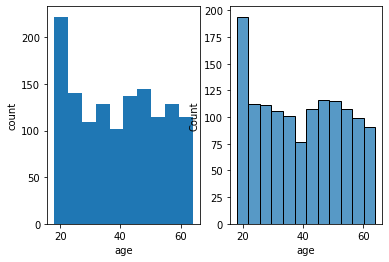

In [ ]:
plt.subplot(121)
plt.hist(data.age,bins=10)
plt.ylabel('count')
plt.xlabel('age')
plt.subplot(122)
sns.histplot(data=data,x='age')
plt.show()

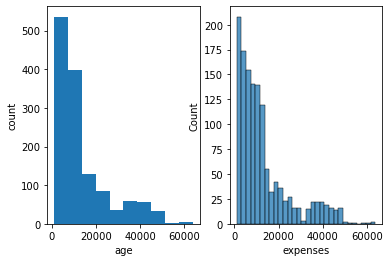

In [ ]:
plt.subplot(121)
plt.hist(data.expenses)
plt.ylabel('count')
plt.xlabel('age')
plt.subplot(122)
sns.histplot(data=data,x='expenses')
plt.show()

<AxesSubplot:xlabel='sex', ylabel='expenses'>

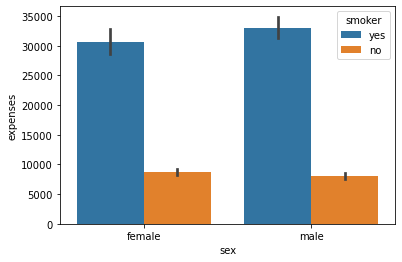

In [ ]:
sns.barplot(x='sex',y='expenses',data=data,hue='smoker')

## 데이터 전처리(Preprocessing)
* 데이터를 모델링 할 수 있게 다듬는 과정
* Dtype : object -> integer or float
* 성능을 높이기 위한 전처리

### One-Hot Encoding
#####  Object -> Integer(Bool) 
* Female,Man -> 0,1
* Yes,no -> 1,0
* region_northeast, region_northwest, region_southeast, region_southwest -> (1 0 0 0) or (0 1 0 0) or (0 0 1 0) or (0 0 0 1)

In [ ]:
aa = {'yes':1,
     'no' : 0}

data.smoker.map(aa)    # 1
data['smoker']=data['smoker'].apply(lambda x:x=='yes').astype(int)   # 2
(data.smoker == 'yes').astype(int)    # 3
data.smoker.eq('yes').add(0)    # 4
data.smoker.eq('yes').mul(1)    # 5

0       0
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    0
Name: smoker, Length: 1338, dtype: int32

In [ ]:
data.smoker

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int32

In [ ]:
pd.get_dummies(data,columns=['sex','region'])    # 풀어서 해당되는 index에 1로 표현

,age,bmi,children,smoker,expenses,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,1,16884.92,1,0,0,0,0,1
1,18,33.8,1,0,1725.55,0,1,0,0,1,0
2,28,33.0,3,0,4449.46,0,1,0,0,1,0
3,33,22.7,0,0,21984.47,0,1,0,1,0,0
4,32,28.9,0,0,3866.86,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,0,10600.55,0,1,0,1,0,0
1334,18,31.9,0,0,2205.98,1,0,1,0,0,0
1335,18,36.9,0,0,1629.83,1,0,0,0,1,0
1336,21,25.8,0,0,2007.95,1,0,0,0,0,1


In [ ]:
# len(sex)= 2 -> 1, len(region) = 4 -> 3
# 가장 첫번째 고유값 삭제 (연산의 속도 향상)
# 뒤의 값으로만으로도 알 수 있기 때문에 삭제해도 상관x
pd.get_dummies(data,columns=['sex','region'],drop_first=True)    

,age,bmi,children,smoker,expenses,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.9,0,1,16884.92,0,0,0,1
1,18,33.8,1,0,1725.55,1,0,1,0
2,28,33.0,3,0,4449.46,1,0,1,0
3,33,22.7,0,0,21984.47,1,1,0,0
4,32,28.9,0,0,3866.86,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,0,10600.55,1,1,0,0
1334,18,31.9,0,0,2205.98,0,0,0,0
1335,18,36.9,0,0,1629.83,0,0,1,0
1336,21,25.8,0,0,2007.95,0,0,0,1


In [ ]:
df = data.copy()
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,1,southwest,16884.92
1,18,male,33.8,1,0,southeast,1725.55
2,28,male,33.0,3,0,southeast,4449.46
3,33,male,22.7,0,0,northwest,21984.47
4,32,male,28.9,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,0,northwest,10600.55
1334,18,female,31.9,0,0,northeast,2205.98
1335,18,female,36.9,0,0,southeast,1629.83
1336,21,female,25.8,0,0,southwest,2007.95


In [ ]:
data = pd.get_dummies(data,columns=['sex','region'],drop_first=True)


KeyError: "None of [Index(['sex', 'region'], dtype='object')] are in the [columns]"

In [ ]:
data

,age,bmi,children,smoker,expenses,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.9,0,1,16884.92,0,0,0,1
1,18,33.8,1,0,1725.55,1,0,1,0
2,28,33.0,3,0,4449.46,1,0,1,0
3,33,22.7,0,0,21984.47,1,1,0,0
4,32,28.9,0,0,3866.86,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,0,10600.55,1,1,0,0
1334,18,31.9,0,0,2205.98,0,0,0,0
1335,18,36.9,0,0,1629.83,0,0,1,0
1336,21,25.8,0,0,2007.95,0,0,0,1


In [ ]:
X = data.drop('expenses',axis=1)
y= data['expenses']
X,y

(      age   bmi  children  smoker  sex_male  region_northwest  \
 0      19  27.9         0       1         0                 0   
 1      18  33.8         1       0         1                 0   
 2      28  33.0         3       0         1                 0   
 3      33  22.7         0       0         1                 1   
 4      32  28.9         0       0         1                 1   
 ...   ...   ...       ...     ...       ...               ...   
 1333   50  31.0         3       0         1                 1   
 1334   18  31.9         0       0         0                 0   
 1335   18  36.9         0       0         0                 0   
 1336   21  25.8         0       0         0                 0   
 1337   61  29.1         0       1         0                 1   
 
       region_southeast  region_southwest  
 0                    0                 1  
 1                    1                 0  
 2                    1                 0  
 3                    0       

## Train,Test 분리

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [ ]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

      age   bmi  children  smoker  sex_male  region_northwest  \
1204   18  27.3         3       1         0                 0   
829    39  21.9         1       0         1                 1   
1077   21  26.0         0       0         1                 0   
416    52  34.1         0       0         1                 0   
1295   20  22.0         1       0         1                 0   
...   ...   ...       ...     ...       ...               ...   
1242   22  21.3         3       0         0                 1   
924    43  23.2         0       0         1                 0   
1247   33  29.4         4       0         1                 0   
271    50  34.2         2       1         1                 0   
474    54  25.1         3       1         1                 0   

      region_southeast  region_southwest  
1204                 1                 0  
829                  0                 0  
1077                 0                 0  
416                  1                 0  
1295

## 모델 학습
>- 모델링
>- 모델링에 사용할 알고리즘 선택
>- 독립변수와 종속변수를 fit하여 학습진행

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [ ]:
pred = model.predict(X_test)

In [ ]:
comparison = pd.DataFrame({
    'actual' : y_test,
    'pred' : pred
})

comparison

,actual,pred
698,10976.25,13305.674553
520,25656.58,9983.611210
1144,9630.40,11682.243737
908,15170.07,18032.375516
559,1646.43,4740.799751
...,...,...
851,14119.62,15203.140686
109,47055.53,38755.998869
941,9549.57,16287.891150
600,1633.04,5428.969455


<AxesSubplot:xlabel='actual', ylabel='pred'>

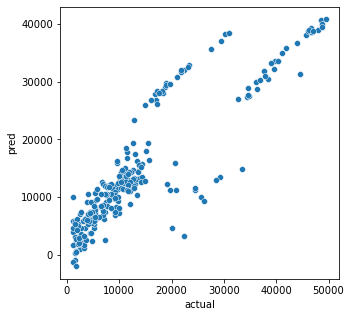

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
sns.scatterplot(x='actual',y='pred',data=comparison)


<AxesSubplot:xlabel='actual', ylabel='pred'>

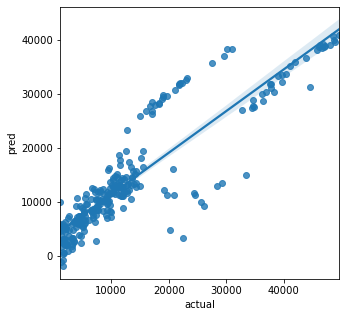

In [ ]:
plt.figure(figsize=(5,5))
sns.regplot(x='actual',y='pred',data=comparison)


## RMSE & R²
>- MAE(Mean Absolute Error) : abs(실제-예측) 들의 평균, 0에 가까우면 좋음
>- MSE(Mean squared Error) : pow(실제-예측,2)들의 평균, 0에 가까우면 좋음
>- RMSE(Root Mean Squared Error) : root(MSE), 0에 가까우면 좋음 일반적으로 사용
>- R²: 결정계수, 1에 가까울 수록 좋음

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# MSE
mean_squared_error(y_test,pred)

30685749.46573799

In [ ]:
# RMSE
mean_squared_error(y_test,pred)**0.5
mean_squared_error(y_test,pred,squared=False)

5539.471948276117

In [ ]:
model.score(X_train,y_train) # R²


0.738684866864797

In [ ]:
import numpy as np
model.coef_ # 각 독립변수가 단위별(1)로 얼마나 y값에 영향을 미치는지

# 수식을 나타낼때 가중치로 사용 가능
# 절대값이 클 수록 영향이 크다
# 스케일링이 중요.

array([  248.0747473 ,   341.05047148,   567.28152844, 23717.79639542,
        -155.82367665,  -159.17943468,  -640.6454047 ,  -951.25416336])

In [ ]:
pd.Series(model.coef_,index=X.columns)

age                   248.074747
bmi                   341.050471
children              567.281528
smoker              23717.796395
sex_male             -155.823677
region_northwest     -159.179435
region_southeast     -640.645405
region_southwest     -951.254163
dtype: float64

In [ ]:
model.intercept_  # 모든게 0일때 기본값

-11764.909073858324

In [ ]:
import joblib

joblib.dump(model,'first_model.pkl')

['first_model.pkl']

In [ ]:
model_from_joblib = joblib.load('first_model.pkl')
model_from_joblib

LinearRegression()

In [ ]:
pd.Series(model_from_joblib.coef_, index = X.columns)

age                   248.074747
bmi                   341.050471
children              567.281528
smoker              23717.796395
sex_male             -155.823677
region_northwest     -159.179435
region_southeast     -640.645405
region_southwest     -951.254163
dtype: float64